In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix


In [3]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


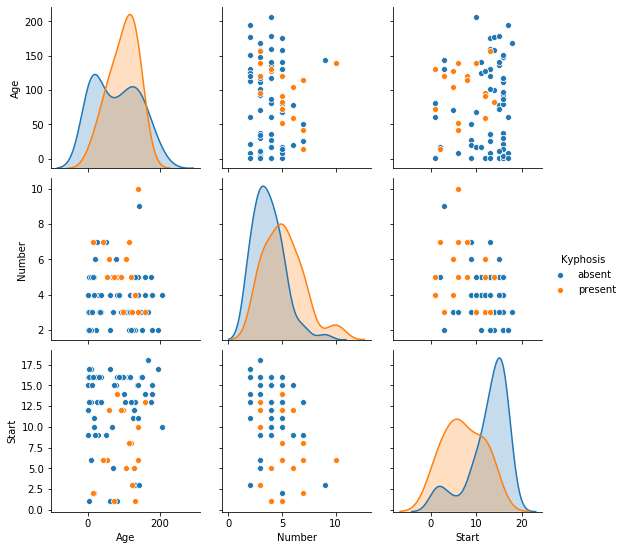

In [4]:
sns.pairplot(df,hue = 'Kyphosis')

In [6]:
X = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
dtc = DecisionTreeClassifier()

In [9]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
prediction = dtc.predict(X_test)

In [11]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [13]:
rft = RandomForestClassifier(n_estimators=100)
rft.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
prediction_rft = rft.predict(X_test)

In [15]:
print(classification_report(y_test,prediction_rft))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [27]:
err_rate = []
for i in range(1,100):
    rft = RandomForestClassifier(n_estimators=i)
    rft.fit(X_train,y_train)
    pred_i = rft.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

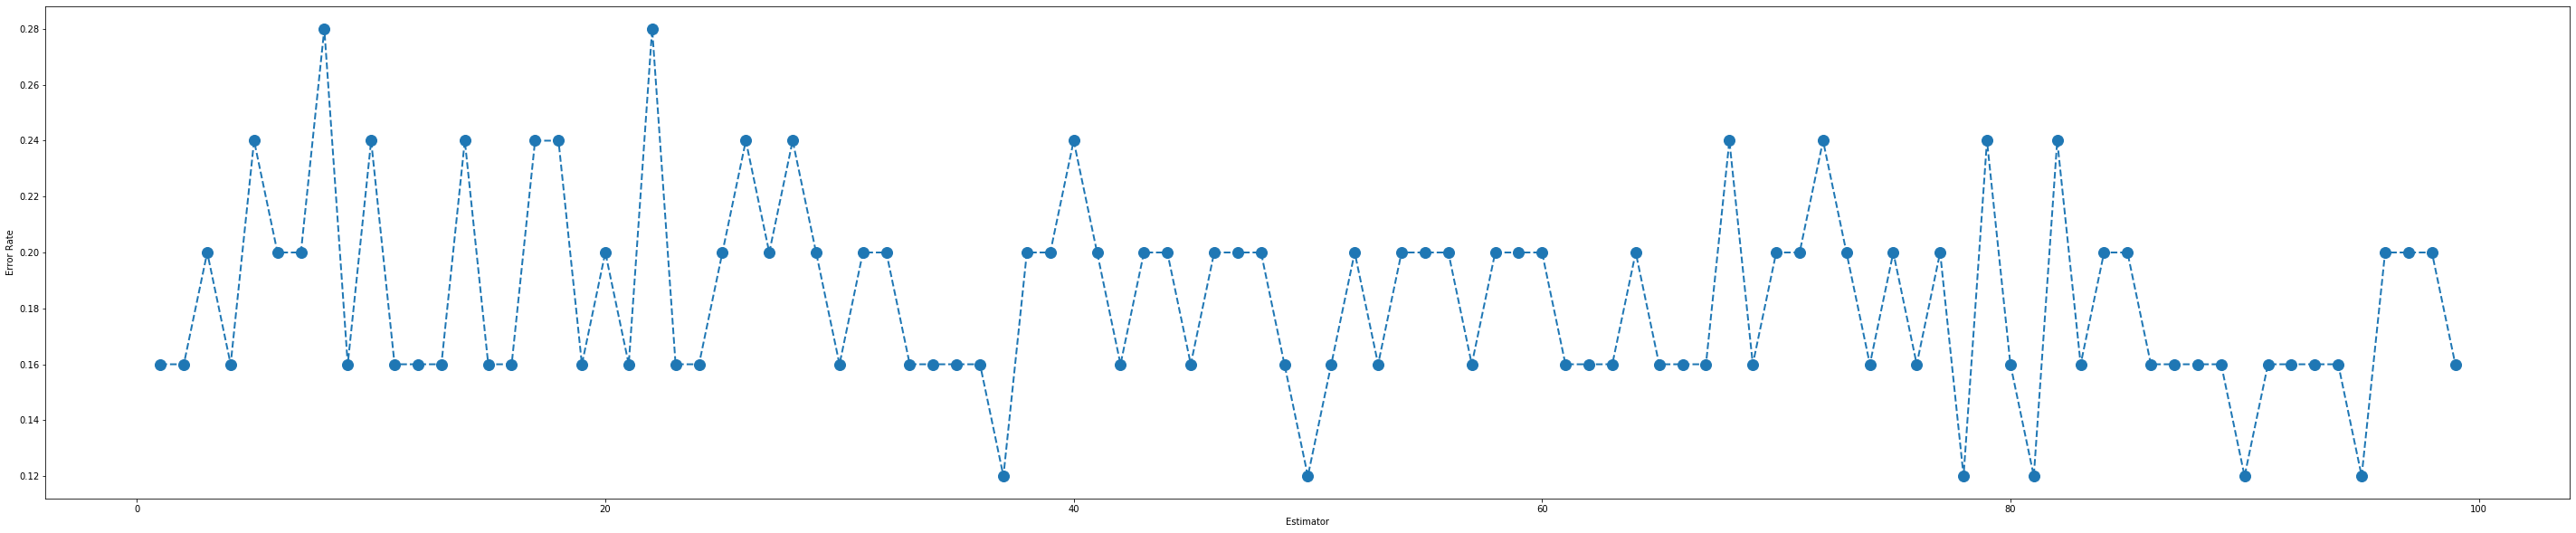

In [35]:
plt.figure(figsize=(50,10))
plt.xlabel("Estimator")
plt.ylabel('Error Rate')
plt.plot(range(1,100),err_rate,markersize = 12,marker='o', linestyle='dashed',linewidth  = 2)

In [41]:
rft = RandomForestClassifier(n_estimators=95)
rft.fit(X_train,y_train)
prediction_rft = rft.predict(X_test)
print(classification_report(y_test,prediction_rft))

              precision    recall  f1-score   support

      absent       0.83      1.00      0.90        19
     present       1.00      0.33      0.50         6

    accuracy                           0.84        25
   macro avg       0.91      0.67      0.70        25
weighted avg       0.87      0.84      0.81        25

